In [89]:
import numpy as np
import pandas as pd
import os
np.set_printoptions(suppress=True)

In [20]:
data_dir = '../data/_datasets/'
data_file = 'seq_dg_cluster_final_230607_v2.csv'
data_file = os.path.join(data_dir, data_file)
df = pd.read_csv(data_file, sep='\t', low_memory=False)
df.head(3)

,complex_id,dataset_id,UniProt,protein_sequence,nucleotide_sequence,protein_mutation,nucleic_acid_type,nucleic_acid_type_new,Kd,dG,...,cluster_na_50_index,cluster_na_50_number,cluster_na_50_member,protein_na_pair_index,protein_50_na_50,protein_50_na_50_number,cluster_protein_na_pair_index,dataset_id_pdb_id_protein_index,protein_species,na_jobid
0,0,pnat_143,P04150,MDSKESLTPGREENPSSVLAQERGDVMDFYKTLRGGATVKVSASSP...,CGCCTCCGGGAGAGCT,wild,ssDNA,ssDNA,3.6e-07,-8.79,...,Cluster_1008,1,ssDNA0,protein_6_ssDNA0,protein_6_ssDNA0,1,cluster_pair_0,pnat_143_3fyl_protein_6,Rattus norvegicus,DNA_0022
1,1,pnat_13395,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCTTCCCT,wild,DNA,ssDNA,1.83e-06,-7.83,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA1,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13395_1jmc_protein_12,Homo sapiens,DNA_0225
2,2,pnat_13396,P27694,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,CCCTTCTTTCTCTTCCCCCTCTCCTTCTTGCGCTCTTCCTTCCCCT...,wild,DNA,ssDNA,1.39e-06,-7.99,...,Cluster_1009,2,"ssDNA1,ssDNA2",protein_12_ssDNA2,"protein_12_ssDNA1,protein_12_ssDNA2",2,cluster_pair_1,pnat_13396_1jmc_protein_12,Homo sapiens,DNA_0226


In [85]:
def process(key, sub_df, target, output_groups, property_by_key):
    
    indices = sub_df["nucleic_acid_type_new"].str.contains(target)
    df = sub_df[indices]
    if len(df) == 0:
        return
    output_groups[(key, target)] = df
    
    dGs = df["dG"].to_numpy()
    
    prots = df["protein_sequence"]
    prots_length = np.array([len(it) for it in prots])
    nucs = df["nucleotide_sequence"]
    nucs_length = np.array([len(it) for it in nucs])
    
    prop = {
        "dG_var" : dGs.var(),
        "size" : len(df),
        "prot_len_var" : prots_length.var(),
        "nuc_len_var" : nucs_length.var(),
    }
    property_by_key[(key, target)] = prop

groups = {}
for key, sub_df in df.groupby("cluster_protein_na_pair_index"):
    groups[key] = sub_df
print(len(groups.keys()))
# for k, v in groups.items():
#     print(k)

new_groups = {}
property_by_key = {}
for key, sub_df in groups.items():
    process(key, sub_df, "DNA", new_groups, property_by_key)
    process(key, sub_df, "RNA", new_groups, property_by_key)

print(len(new_groups.keys()))

4457
4457


In [92]:
new_groups_by_dna = {}
new_groups_by_rna = {}
for k, v in new_groups.items():
    if "DNA" in k:
        new_groups_by_dna[k[0]] = v
    else:
        new_groups_by_rna[k[0]] = v

In [91]:
dg_vars_by_key = {}
for k, v in property_by_key.items():
    dg_vars_by_key[k] = v['dG_var']
dg_vars_by_key

{('cluster_pair_0', 'DNA'): 0.0,
 ('cluster_pair_1', 'DNA'): 0.006400000000000012,
 ('cluster_pair_10', 'DNA'): 0.0,
 ('cluster_pair_100', 'DNA'): 0.0,
 ('cluster_pair_1000', 'DNA'): 0.0,
 ('cluster_pair_1001', 'DNA'): 0.0,
 ('cluster_pair_1002', 'DNA'): 0.0,
 ('cluster_pair_1003', 'DNA'): 0.0,
 ('cluster_pair_1004', 'DNA'): 0.0,
 ('cluster_pair_1005', 'DNA'): 0.0,
 ('cluster_pair_1006', 'DNA'): 0.0,
 ('cluster_pair_1007', 'DNA'): 0.0,
 ('cluster_pair_1008', 'DNA'): 0.0,
 ('cluster_pair_1009', 'DNA'): 0.0,
 ('cluster_pair_101', 'DNA'): 0.0,
 ('cluster_pair_1010', 'DNA'): 0.0,
 ('cluster_pair_1011', 'DNA'): 0.0,
 ('cluster_pair_1012', 'DNA'): 0.0,
 ('cluster_pair_1013', 'DNA'): 0.0,
 ('cluster_pair_1014', 'DNA'): 0.0,
 ('cluster_pair_1015', 'DNA'): 0.0,
 ('cluster_pair_1016', 'DNA'): 0.0,
 ('cluster_pair_1017', 'DNA'): 0.0,
 ('cluster_pair_1018', 'DNA'): 0.0,
 ('cluster_pair_1019', 'DNA'): 0.0,
 ('cluster_pair_102', 'DNA'): 0.0,
 ('cluster_pair_1020', 'DNA'): 0.0,
 ('cluster_pair_1021',

In [86]:
v_vars = []
v_sizes = []
v_prot_len_var = []
for k, v in property_by_key.items():
    v_vars.append(v['dG_var'])
    v_sizes.append(v['size'])
    v_prot_len_var.append(v['prot_len_var'])
v_vars = np.array(v_vars)
v_sizes = np.array(v_sizes)
v_prot_len_var = np.array(v_prot_len_var)

In [98]:
len(v_vars), len(v_vars[v_vars > 0.1]), v_vars[v_vars > 0.1]

(4457,
 615,
 array([ 0.31640625,  0.10248438,  0.20127899,  0.41730898,  0.23622702,
         0.13868889,  0.11768125,  0.42108064,  0.65973521,  0.11428099,
         0.16137222,  0.25051267,  0.12307802,  0.49667222,  0.46450556,
         0.16499691,  1.22831   ,  0.123536  ,  0.32866066,  0.191675  ,
         0.93204161,  0.3078375 ,  3.37800067,  0.23367934,  0.27556875,
         0.57975556,  0.525625  ,  0.5476    ,  0.16841   ,  2.51255   ,
         3.00129167,  0.467021  ,  0.982816  ,  0.40698367,  0.258675  ,
         0.66609822,  0.50266224,  0.59130579,  0.1156    ,  0.46194711,
         0.225625  ,  0.11046667,  0.25028889,  0.35868889,  1.33368889,
         0.446536  ,  0.21206667,  0.32842222,  0.23025306,  0.140625  ,
         0.207025  ,  1.357225  ,  1.49168678,  0.22524722,  0.5329    ,
         0.5751    ,  0.1296    ,  0.39902222,  0.16      ,  0.2209    ,
         0.11526667,  0.1877125 ,  1.99594011,  1.90757344,  0.18438056,
         6.85748889,  2.435424  ,  0.7

In [99]:
target_sizes = v_sizes[v_vars > 0.1]
print(np.sum(target_sizes))
neg_target_sizes = v_sizes[v_vars <= 0.1]
print(np.sum(neg_target_sizes))

6822
10439


In [121]:
ids = np.where(v_vars > 0.1)
arr_keys = np.array(list(new_groups.keys()))
target_keys = arr_keys[ids]
max_id = np.argmax(target_sizes)
target_keys[max_id]

array(['cluster_pair_2937', 'DNA'], dtype='<U17')

In [126]:
new_groups[('cluster_pair_2937', 'DNA')]['dG'].to_numpy()

array([-10.585     , -10.545     , -10.785     , -10.75      ,
       -10.85      , -10.605     , -10.875     , -10.785     ,
       -10.905     ,  -9.71833333,  -9.71833333,  -9.375     ,
        -9.44333333,  -9.44333333, -10.11      ,  -9.49833333,
        -9.49833333,  -9.45666667,  -9.45666667,  -9.75666667,
        -9.75666667,  -9.85666667,  -9.85666667,  -9.80166667,
        -9.80166667,  -9.754     ,  -9.754     , -11.082     ,
       -10.528     , -11.004     , -10.86      , -10.77      ,
       -10.96      , -10.922     , -10.9       , -11.144     ,
       -11.026     , -11.042     ,  -9.036     ,  -9.036     ,
       -11.095     , -11.035     ,  -9.45      , -10.585     ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66      ,
       -11.66      , -11.66      , -11.66      , -11.66

In [120]:
max_id = np.argmax(target_sizes)
target_vars = v_vars[v_vars > 0.1]
target_vars[max_id], target_sizes[max_id]

(0.6406935123809522, 175)

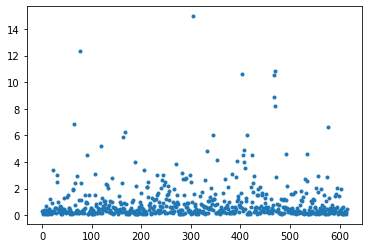

In [101]:
import matplotlib.pyplot as plt
import numpy as np



plt.plot(v_vars[v_vars > 0.1], '.')
plt.show()

In [127]:
import torch

/home/megvii/anaconda3/envs/paul-py3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [133]:
x = torch.rand(10, 32)
torch.max(x, dim=0)

torch.return_types.max(
values=tensor([0.9802, 0.7852, 0.8914, 0.6288, 0.8052, 0.9964, 0.9284, 0.7871, 0.9277,
        0.9885, 0.9680, 0.9229, 0.9778, 0.9293, 0.7119, 0.9898, 0.8312, 0.8901,
        0.9619, 0.9860, 0.9378, 0.9683, 0.6939, 0.9545, 0.9275, 0.7811, 0.9122,
        0.9497, 0.9969, 0.7546, 0.9806, 0.9876]),
indices=tensor([7, 2, 7, 8, 5, 7, 1, 6, 8, 9, 8, 6, 3, 4, 2, 9, 0, 2, 4, 9, 7, 6, 2, 0,
        5, 8, 3, 6, 9, 6, 0, 0]))

In [140]:
import torch.nn as nn
reg_head = nn.Linear(10,10, bias=False)
# nn.init.kaiming_uniform_(reg_head.weight, a=1)

In [141]:
lr = 0.001
lr *= 0.5
print(lr)
lr *= 0.5
print(lr)

0.0005
0.00025
